<a href="https://colab.research.google.com/github/Vinuji-Hewapathirana/Machine-Learning---Coursework/blob/main/ML_RFC_full_hyper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('bank-additional-full.csv', sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# Drop the 'duration' column
data = data.drop(columns=['duration','contact'])

# Display the first few rows to verify
data.head()

,age,job,marital,education,default,housing,loan,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
X = data.drop(columns=['y'])
y = data['y']

print(f"Input features (X): {X.shape}")
print(f"Target variable (y): {y.shape}")

#encoding the y attribute
y_encoded = y.map({'yes':1, 'no':0})
print(y_encoded.head())

Input features (X): (41188, 18)
Target variable (y): (41188,)
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best ROC-AUC Score on Training Data: 0.7909814131741643
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.71      0.21      0.32       928

    accuracy                           0.90      8238
   macro avg       0.81      0.60      0.64      8238
weighted avg       0.89      0.90      0.88      8238

ROC-AUC Score: 0.8072476148639087


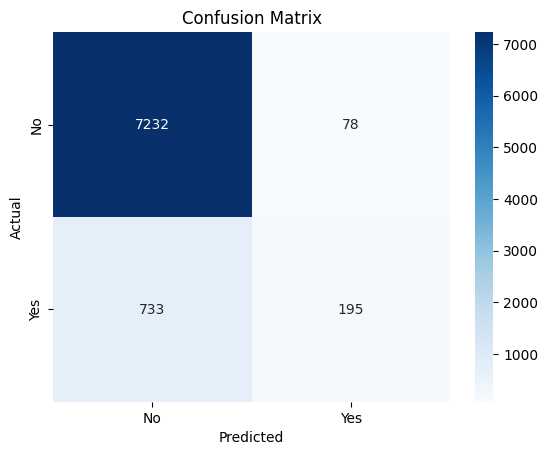

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 1. Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 2. Create preprocessing transformers
# Numeric preprocessing: Impute missing values with mean and scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())                 # Scale numerical features
])

# Categorical preprocessing: Impute missing values with mode and encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode categorical features
])

# 3. Combine preprocessing steps for numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# 4. Create the pipeline with a placeholder RandomForestClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 5. Define the hyperparameter grid for RandomForestClassifier
param_grid = {
    'classifier__n_estimators': [100, 200],  # Number of trees in the forest
    'classifier__max_depth': [10, None],      # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5],  # Minimum number of samples to split
    'classifier__min_samples_leaf': [1, 2]     # Minimum number of samples per leaf
}

# 6. Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(
    pipeline, param_grid, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2
)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score on Training Data:", grid_search.best_score_)

# Use the best model from GridSearchCV to make predictions
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report")
print(classification_report(y_test, y_pred))

# Calculate and print the ROC-AUC Score
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
